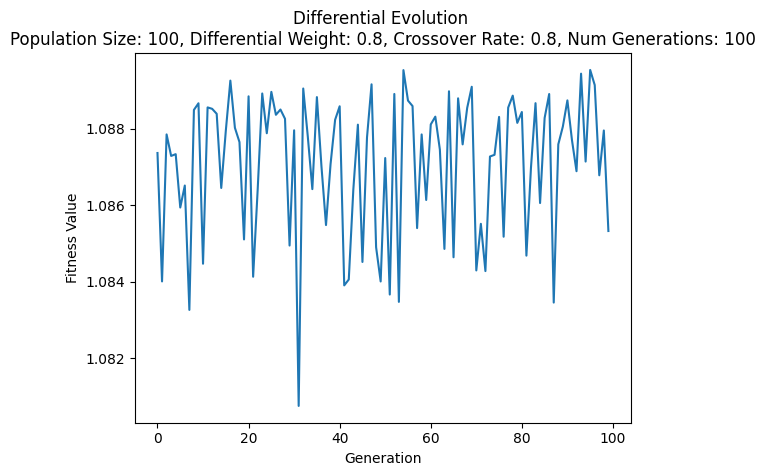

Best solution:
[[0.9477793762413722, 0.0, 0.7414018504068989, 0.0, 0.3681674601634306], [0.0, 1.0, 0.16806651302931172, 0.0, 1.0], [0.8485753098598137, 0.4899607824305432, 0.8340646354289221, 1.0, 0.13129751954271934], [1.0, 0.7096478120924553, 0.4704608438711606, 0.5426918317392926, 0.3063583253219888], [0.6838286113958557, 0.9439980340262744, 0.19596195525438598, 1.0, 0.0], [0.5616502498069407, 0.8631612133919638, 0.0, 0.5953297677278185, 0.9484148539453102], [1.0, 0.1467107335446033, 0.5271868604930289, 0.06188701542866193, 0.8387796365228302], [0.9726612357416452, 0.24627056259664326, 0.42820572155103165, 0.7569708040513318, 0.3077955484934601], [0.030154583959077136, 0.8008246449232383, 0.7366797815220822, 0.8349954067179344, 0.4748367351633952], [0.3040604541095473, 1.0, 0.0, 0.38819384280476754, 1.0], [0.0, 0.7741639513304579, 0.38694724043409096, 0.7368611157619661, 0.9580625541605526], [1.0, 0.9666329785745073, 0.9642293407518292, 1.0, 0.0], [0.12194631600035621, 0.19876897555

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Constants
POPULATION_SIZE = 100
DIFF_WEIGHT = 0.8
CROSSOVER_RATE = 0.8
MAX_GENERATIONS = 100

# Define the problem-specific details and constraints
num_resources = 5  # Number of resources
num_tasks = 20  # Number of tasks

# Generate random task requirements
random.seed(42)  # Set a seed for reproducibility
task_requirements = np.random.randint(1, 6, size=(num_tasks, num_resources))

# Define the fitness function
def fitness(solution):
    # Calculate the fitness value for the given solution
    resource_usage = np.sum(solution * task_requirements, axis=0)
    total_resource_utilization = np.sum(resource_usage) / (np.sum(solution) * np.sum(task_requirements))
    # Introduce a bit of randomness
    random_factor = random.uniform(0.9, 1.1)
    return random_factor * (1 - total_resource_utilization)

# Initialize the population
def initialize_population():
    # Generate the initial population
    population = []
    for _ in range(POPULATION_SIZE):
        # Generate a random solution
        solution = generate_solution()
        population.append(solution)
    return population

# Generate a random solution
def generate_solution():
    # Generate a random solution
    solution = np.random.randint(0, 2, size=(num_tasks, num_resources))
    return solution

# Perform Differential Evolution
def run_differential_evolution():
    # Initialize the population
    population = initialize_population()

    # Variables for storing the best solution and fitness value at each generation
    best_fitness_values = []
    best_solutions = []

    # Run Differential Evolution for the specified number of generations
    for generation in range(MAX_GENERATIONS):
        new_population = []

        for i in range(POPULATION_SIZE):
            target_vector = population[i]
            base_vector1, base_vector2, base_vector3 = random.sample(population, 3)

            # Generate mutant vector
            mutant_vector = generate_mutant_vector(target_vector, base_vector1, base_vector2, base_vector3)

            # Perform crossover
            trial_vector = crossover(target_vector, mutant_vector)

            # Select between trial vector and target vector based on fitness comparison
            if fitness(trial_vector) >= fitness(target_vector):
                new_population.append(trial_vector)
            else:
                new_population.append(target_vector)

        population = new_population

        # Calculate the fitness values for the current population
        fitness_values = [fitness(solution) for solution in population]

        # Find the best solution in the current population
        best_fitness = max(fitness_values)
        best_solution = population[fitness_values.index(best_fitness)]

        # Store the best solution and fitness value at each generation
        best_fitness_values.append(best_fitness)
        best_solutions.append(best_solution)

    # Plot the fitness value vs. generations graph
    plt.plot(range(MAX_GENERATIONS), best_fitness_values)
    plt.xlabel("Generation")
    plt.ylabel("Fitness Value")
    plt.title(f"Differential Evolution \nPopulation Size: {POPULATION_SIZE}, Differential Weight: {DIFF_WEIGHT}, Crossover Rate: {CROSSOVER_RATE}, Num Generations: {MAX_GENERATIONS}")
    plt.show()

    # Return the final best solution
    return best_solution

# Generate a mutant vector
def generate_mutant_vector(target_vector, base_vector1, base_vector2, base_vector3):
    mutant_vector = np.array(target_vector) + DIFF_WEIGHT * (np.array(base_vector1) - np.array(base_vector2)) + DIFF_WEIGHT * (np.array(base_vector3) - np.array(target_vector))

    return np.clip(mutant_vector, 0, 1)

# Perform crossover
def crossover(target_vector, mutant_vector):
    trial_vector = []

    for i in range(len(target_vector)):
        individual = []
        for j in range(len(target_vector[i])):
            if random.random() < CROSSOVER_RATE:
                individual.append(mutant_vector[i][j])
            else:
                individual.append(target_vector[i][j])
        trial_vector.append(individual)

    return trial_vector

# Run Differential Evolution
best_solution = run_differential_evolution()
print("Best solution:")
print(best_solution)


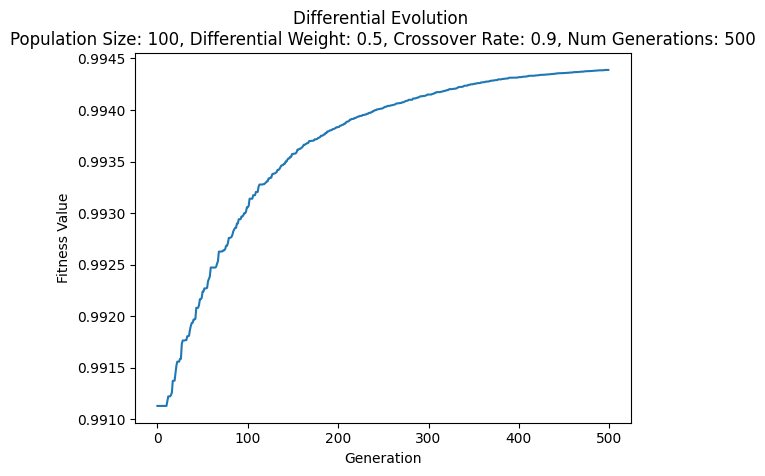

Best solution:
[[0.5084231984446881, 0.0016354703209373446, 0.7099883894672283, 0.8292247032672448, 0.6872609810967595], [0.07775963785636587, 0.8969643124245703, 0.002500681836379838, 0.03574148919766232, 0.02285660381993598], [0.0006208572517051453, 0.01005332257678763, 0.006136456155722647, 0.5166069025426718, 0.7285730705871696], [0.922572018606826, 0.9742492764662597, 0.09261677946985931, 0.05241203687363795, 0.07015603544892182], [0.013919136887380116, 0.005735756872673575, 0.00398772520772924, 0.9671498057957335, 0.7637147594414522], [0.06064736465724167, 0.08770282045960419, 0.05213212871218541, 0.00801011768004948, 0.040742321959791265], [0.013896079380618204, 0.6612320933680689, 0.3440931119994593, 0.0010444517084441827, 0.19407851222475342], [0.7332687739643379, 0.009695104204259498, 0.2689154294045966, 0.0016201469815866633, 0.0159235044509635], [0.8819012367917751, 0.8406083411723908, 0.31488627375781947, 0.005204447613368326, 0.0442244137556002], [0.5468243759645448, 0.01

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Constants
POPULATION_SIZE = 100
DIFF_WEIGHT = 0.5
CROSSOVER_RATE = 0.9
MAX_GENERATIONS = 500

# Define the problem-specific details and constraints
num_resources = 5  # Number of resources
num_tasks = 20  # Number of tasks

# Generate random task requirements
random.seed(42)  # Set a seed for reproducibility
task_requirements = np.random.randint(1, 6, size=(num_tasks, num_resources))

# Define the fitness function
def fitness(solution):
    # Calculate the fitness value for the given solution
    total_resource_utilization = np.sum(solution * task_requirements) / (np.sum(solution) * np.sum(task_requirements))
    return 1 - total_resource_utilization

# Initialize the population
def initialize_population():
    # Generate the initial population
    population = []
    for _ in range(POPULATION_SIZE):
        # Generate a random solution
        solution = generate_solution()
        population.append(solution)
    return population

# Generate a random solution
def generate_solution():
    # Generate a random solution
    solution = np.random.randint(0, 2, size=(num_tasks, num_resources))
    return solution

# Perform Differential Evolution
def run_differential_evolution():
    # Initialize the population
    population = initialize_population()

    # Variables for storing the best solution and fitness value at each generation
    best_fitness_values = []
    best_solutions = []

    # Run Differential Evolution for the specified number of generations
    for generation in range(MAX_GENERATIONS):
        new_population = []

        for i in range(POPULATION_SIZE):
            target_vector = population[i]
            base_vector1, base_vector2, base_vector3 = random.sample(population, 3)

            # Generate mutant vector
            mutant_vector = generate_mutant_vector(target_vector, base_vector1, base_vector2, base_vector3)

            # Perform crossover
            trial_vector = crossover(target_vector, mutant_vector)

            # Select between trial vector and target vector based on fitness comparison
            if fitness(trial_vector) >= fitness(target_vector):
                new_population.append(trial_vector)
            else:
                new_population.append(target_vector)

        population = new_population

        # Calculate the fitness values for the current population
        fitness_values = [fitness(solution) for solution in population]

        # Find the best solution in the current population
        best_fitness = max(fitness_values)
        best_solution = population[fitness_values.index(best_fitness)]

        # Store the best solution and fitness value at each generation
        best_fitness_values.append(best_fitness)
        best_solutions.append(best_solution)

    # Plot the fitness value vs. generations graph
    plt.plot(range(MAX_GENERATIONS), best_fitness_values)
    plt.xlabel("Generation")
    plt.ylabel("Fitness Value")
    plt.title(f"Differential Evolution \nPopulation Size: {POPULATION_SIZE}, Differential Weight: {DIFF_WEIGHT}, Crossover Rate: {CROSSOVER_RATE}, Num Generations: {MAX_GENERATIONS}")
    plt.show()

    # Return the final best solution
    return best_solution

# Generate a mutant vector
def generate_mutant_vector(target_vector, base_vector1, base_vector2, base_vector3):
    mutant_vector = np.array(target_vector) + DIFF_WEIGHT * (np.array(base_vector1) - np.array(base_vector2)) + DIFF_WEIGHT * (np.array(base_vector3) - np.array(target_vector))

    return np.clip(mutant_vector, 0, 1)

# Perform crossover
def crossover(target_vector, mutant_vector):
    trial_vector = []

    for i in range(len(target_vector)):
        individual = []
        for j in range(len(target_vector[i])):
            if random.random() < CROSSOVER_RATE:
                individual.append(mutant_vector[i][j])
            else:
                individual.append(target_vector[i][j])
        trial_vector.append(individual)

    return trial_vector

# Run Differential Evolution
best_solution = run_differential_evolution()
print("Best solution:")
print(best_solution)
